In [12]:
# Import Library for Numerical Calculations
import numpy as np
import pandas as pd
import math
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

In [15]:
# Reading informations in the Dataset
car_price = pd.read_csv("CarPrice.csv")

In [16]:
# Checking for null values in Data
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
# Checking the First Five Values in the Data
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
# Checking the Last Five Values in the Data
car_price.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [19]:
# Dimensions of the Dataset
car_price.shape

(205, 26)

In [20]:
# Describing the Dataset
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
# Checking for the classes in the Data
car_price.groupby('carbody').size()

carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
dtype: int64

In [22]:
# Taking the required Informations
car = car_price[["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]]
car

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


C:\Users\rohit\AppData\Local\Temp\ipykernel_24644\1857515076.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


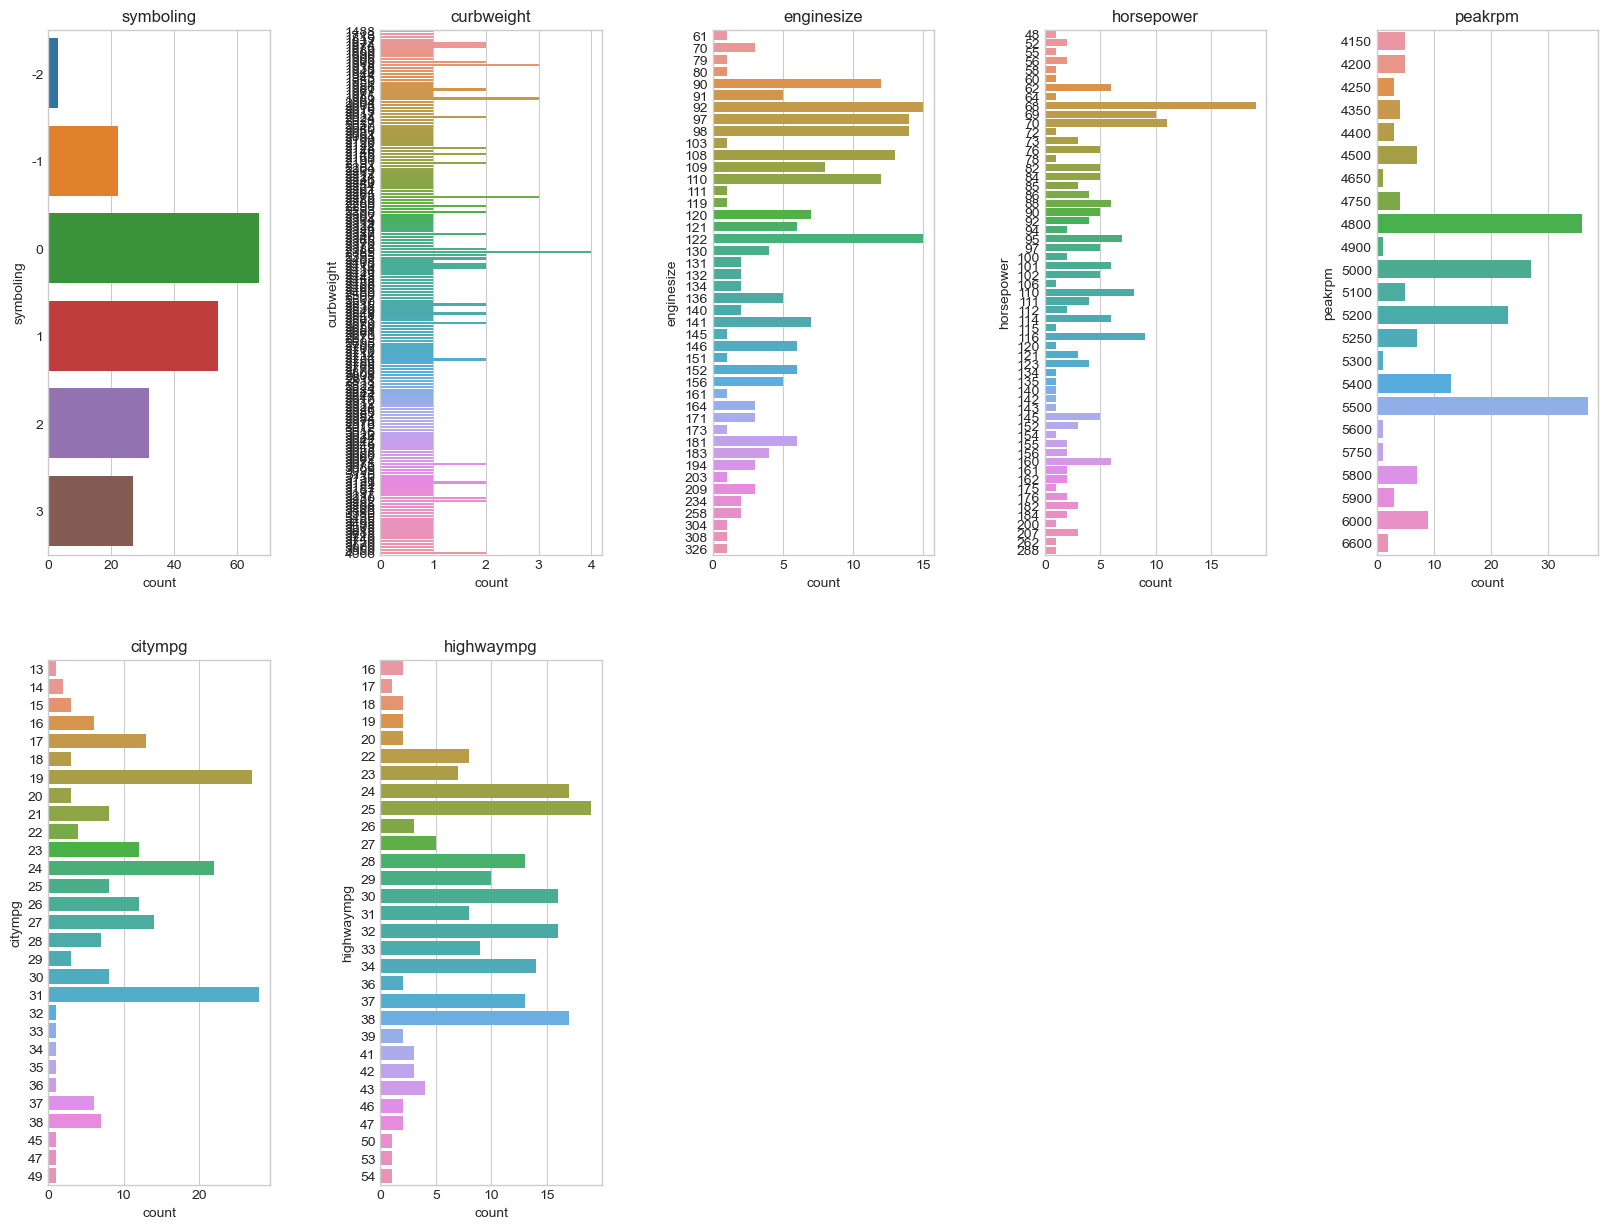

In [23]:
# Plotting the Bivariate Bar for the Dataset
def plot_bivariate_bar(dataset, cols, width, height, hspace, wspace):
    dataset = dataset.select_dtypes(include = [np.int64])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = wspace, hspace = hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.int64:
            g = sns.countplot(y = column, data = dataset)
            substrings = [s.get_text()[:15] for s in g.get_yticklabels()]
            g.set(yticklabels = substrings)

plot_bivariate_bar(car, cols = 5, width = 20, height = 15, hspace = 0.2, wspace = 0.5)

<Figure size 1000x1000 with 0 Axes>

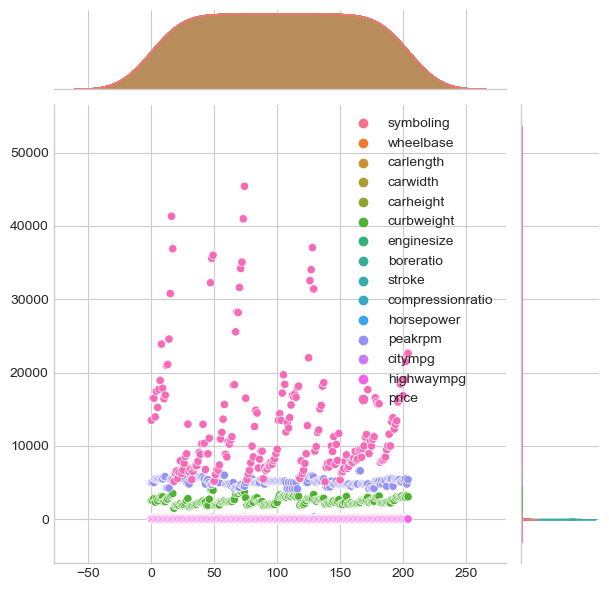

In [24]:
# Plotting the Joint Plot for the Dataset
plt.figure(figsize = (10, 10))
sns.jointplot(data = car)
plt.show()

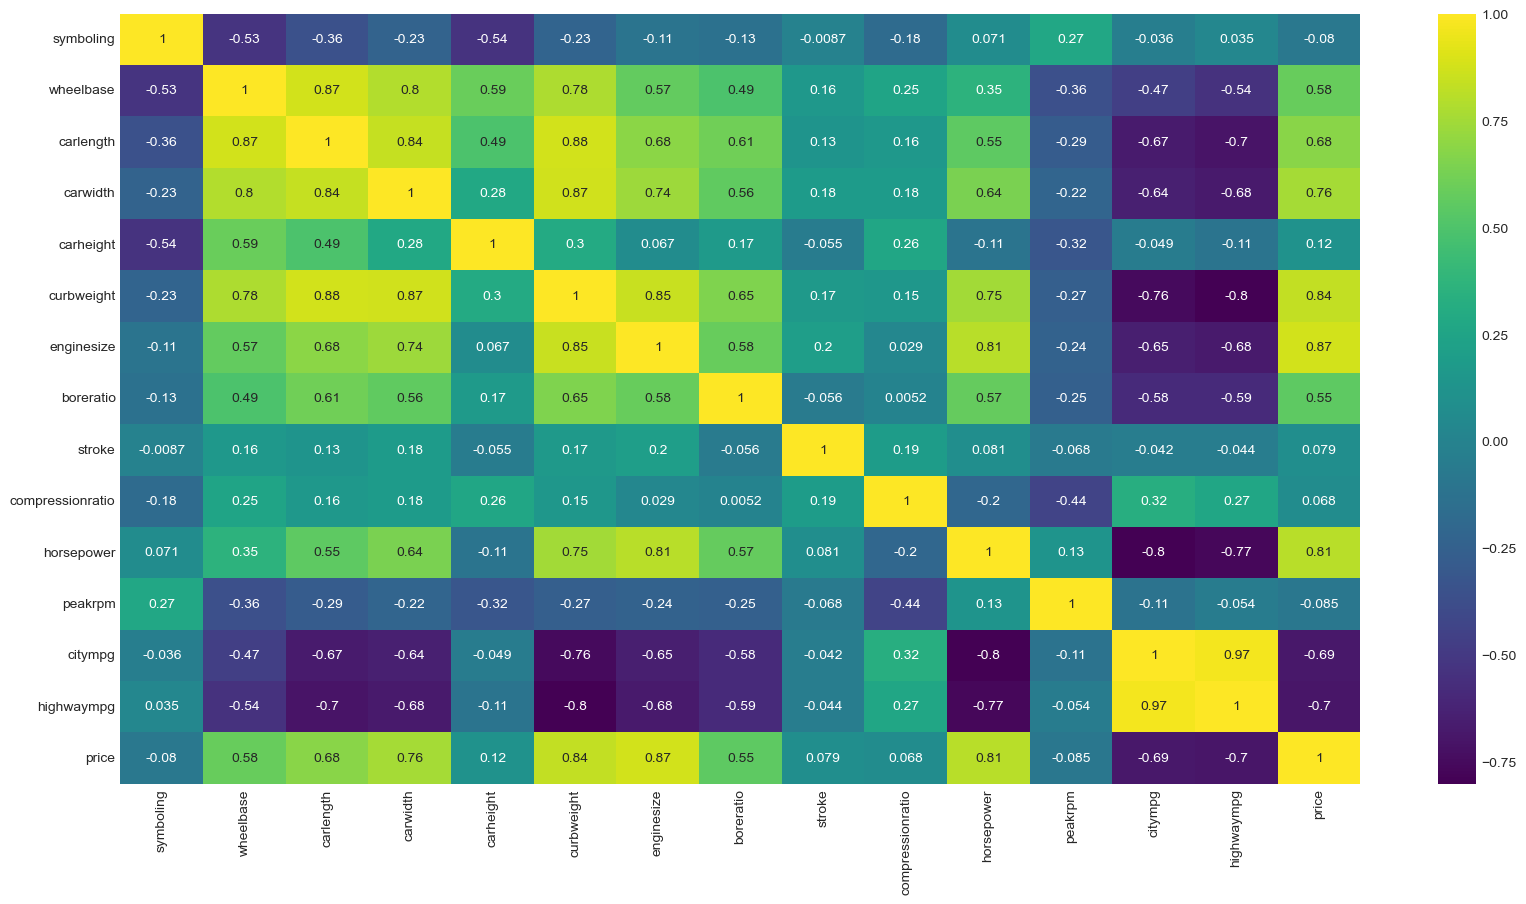

In [25]:
# Plotting the Correlation Matrix of the Dataset
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
sns.heatmap(car.corr(), annot = True, cmap = 'viridis')
plt.show()

In [26]:
x = car.drop(["price"], 1)
y = car["price"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 16, test_size = 0.25, shuffle=True)

C:\Users\rohit\AppData\Local\Temp\ipykernel_24644\3315261086.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = car.drop(["price"], 1)


In [27]:
# Creating the Model
model1 = LinearRegression()
model2 = DecisionTreeRegressor()

In [28]:
# Fitting the Model
model1.fit(xtrain, ytrain)
model1.score(xtrain, ytrain)

0.8330089871124582

In [41]:
model2.fit(xtrain, ytrain)
model2.score(xtrain, ytrain)

0.9997917694852244

In [42]:
Linear_predictions = model1.predict(xtest)
Decision_predictions = model2.predict(xtest)

In [43]:
# Metrics
print("Linear Regression Model:")
print("************************")
print('R2_score:', r2_score(ytest, Linear_predictions))
print('Mean Absolute Error:', mean_absolute_error(ytest, Linear_predictions))
print('Mean Squared Error:', mean_squared_error(ytest, Linear_predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, Linear_predictions)))
print("---------------------------------------------")
print("Decision Tree Regression Model:")
print("******************************")
print('R2_score:', r2_score(ytest, Decision_predictions))
print('Mean Absolute Error:', mean_absolute_error(ytest, Decision_predictions))
print('Mean Squared Error:', mean_squared_error(ytest, Decision_predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, Decision_predictions)))
     

Linear Regression Model:
************************
R2_score: 0.8862171911494973
Mean Absolute Error: 2145.790891929153
Mean Squared Error: 7974570.9672680255
Root Mean Squared Error: 2823.9282864952547
---------------------------------------------
Decision Tree Regression Model:
******************************
R2_score: 0.956576061805409
Mean Absolute Error: 1197.5801346153846
Mean Squared Error: 3043405.9442670965
Root Mean Squared Error: 1744.5360254999312


In [44]:
print("Accuracy of Linear Regression Model: ", model1.score(xtrain, ytrain))
print("Accuracy of Decision Tree Regression Model: ", model2.score(xtrain, ytrain))

Accuracy of Linear Regression Model:  0.8330089871124582
Accuracy of Decision Tree Regression Model:  0.9997917694852244


In [45]:
# Saving the Models
filename = "Linear_Regression.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "Decision_Tree_Regressor.pkl"
pickle.dump(model2, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
